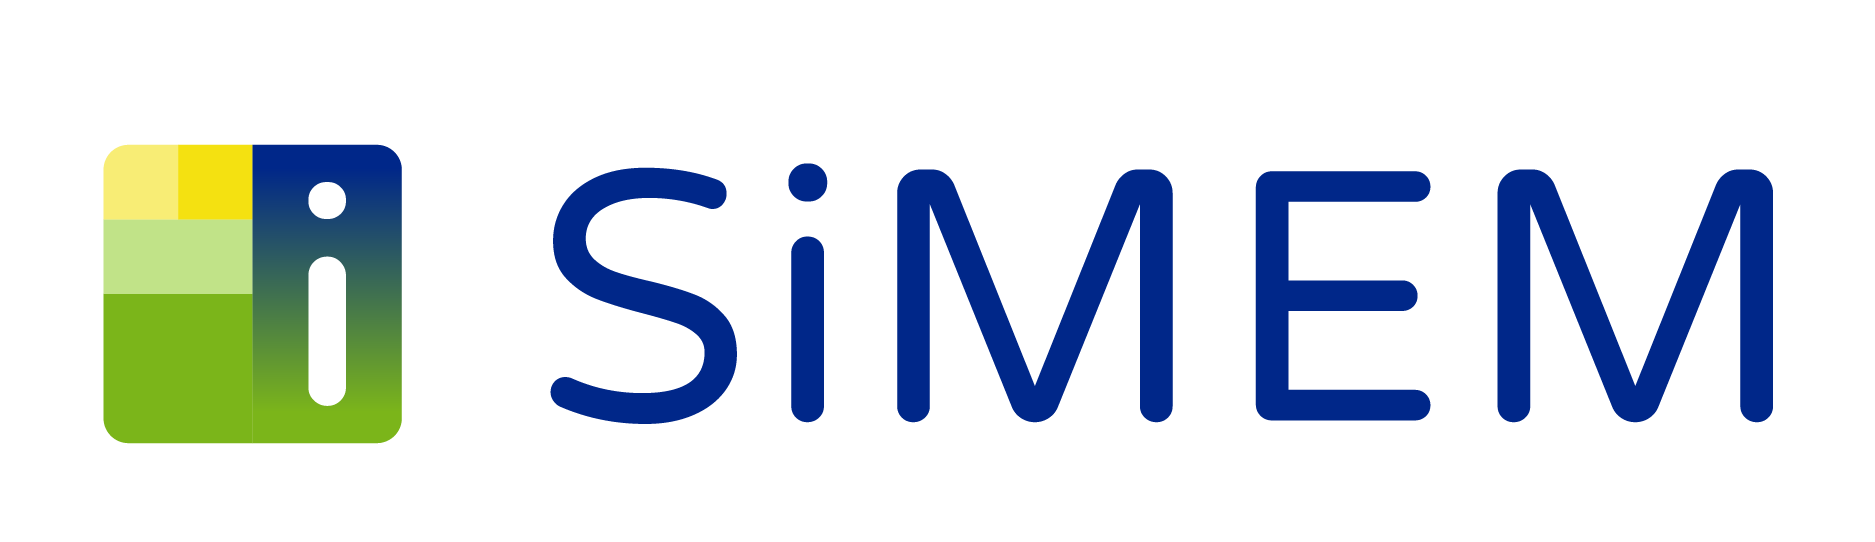

[SiMEM](https://www.simem.co/)

## Caso de uso - Precios de escasez del Cargo por Confiabilidad

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [5]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [6]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM, VariableSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Precios de escasez del Cargo por Confiabilidad](https://www.simem.co/datadetail/AE3F2310-154D-4391-B17C-081A83BC6E0F).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [7]:
id_dataset = 'ae3f23'                                       # ID del conjunto de datos a consultar
fecha_inicial = '2024-01-01'                                # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                  # Fecha de fin del rango de consulta
simem = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_pe = simem.main()                                        # Ejecución del método principal para obtener los datos en un DataFrame
display(df_pe.head(20))                                     # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precios de escasez del Cargo por Confiabilidad"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007517337799072266
Extraccion de registros: 1.3465397357940674
End of data extracting process
****************************************************************************************************


,CodigoVariable,Fecha,CodigoDuracion,Valor
0,PrecioEscasezInferior,2025-06-01,P1M,345.3760
1,PrecioEscasez,2025-06-01,P1M,673.7357
2,PrecioEscasezSuperior,2025-06-01,P1M,858.7901
3,PrecioEscasez,2025-05-01,P1M,724.3077
4,PrecioEscasezSuperior,2025-05-01,P1M,891.2178
5,PrecioEscasezInferior,2025-05-01,P1M,338.5440
6,PrecioEscasezSuperior,2025-04-01,P1M,928.3287
7,PrecioEscasezInferior,2025-04-01,P1M,336.1200
8,PrecioEscasez,2025-04-01,P1M,739.7958
9,PrecioEscasezSuperior,2025-03-01,P1M,937.3031


Se leerá el conjunto de datos con el precio de bolsa horario con los mismos rangos de fechas, y este luego se filtrará por su máxima versión

In [ ]:
cod_variable = 'PB_Nal'                                                 # ID del conjunto de datos a consultar
fecha_inicial = '2024-01-01'                                            # Fecha de inicio del rango de consulta
fecha_final = '2025-06-30'                                              # Fecha de fin del rango de consulta
simem_pbNal = VariableSIMEM(cod_variable, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_pbNal = simem_pbNal.get_data()                                       # Ejecución del método principal para obtener los datos en un DataFrame
display(df_pbNal.head(10))                                              # Visualización de las primeras 10 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa horario"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0011920928955078125
Extraccion de registros: 47.974778175354004
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Versiones de factura para la liquidación mensual"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0019109249114990234
Extraccion de registros: 15.964678525924683
End of data extracting process
**

,,CodigoVariable,CodigoDuracion,UnidadMedida,Valor
FechaHora,Version,,,,
2024-01-31 23:00:00,TX5,PB_Nal,PT1H,COP/kWh,620.1993
2024-01-31 22:00:00,TX5,PB_Nal,PT1H,COP/kWh,620.1993
2024-01-31 21:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 20:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 19:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 18:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 17:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 16:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103
2024-01-31 15:00:00,TX5,PB_Nal,PT1H,COP/kWh,672.3103


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Los dataframes se filtarán para tener los datos necesarios para la visualización.

In [9]:
df_pe_filtrado = df_pe[['Fecha', 'CodigoVariable','Valor']]          # Selecciona únicamente las columnas 'Fecha','CodigoVariable' y 'Valor' del DataFrame

display(df_pe_filtrado.head(5))                                      # Muestra el DataFrame filtrado

,Fecha,CodigoVariable,Valor
0,2025-06-01,PrecioEscasezInferior,345.3760
1,2025-06-01,PrecioEscasez,673.7357
2,2025-06-01,PrecioEscasezSuperior,858.7901
3,2025-05-01,PrecioEscasez,724.3077
4,2025-05-01,PrecioEscasezSuperior,891.2178


In [10]:
df_pe_pivot = df_pe_filtrado.pivot(index='Fecha', columns='CodigoVariable', values='Valor')    # Pivotear el DataFrame usando 'Fecha' como índice
df_pe_pivot.reset_index(inplace=True)                                                          # Devuelve el indice como columna Fecha

display(df_pe_pivot.head(5))                                                                   # Muestra el DataFrame pivoteado

CodigoVariable,Fecha,PrecioEscasez,PrecioEscasezActivacion,PrecioEscasezInferior,PrecioEscasezSuperior,PrecioMarginalEscasez
0,2024-01-01,739.8685,1045.0804,NaN,NaN,1045.0804
1,2024-02-01,745.6851,1019.3739,NaN,NaN,1019.3739
2,2024-03-01,727.8256,1034.4405,NaN,NaN,1034.4405
3,2024-04-01,742.6505,1056.6221,NaN,NaN,1056.6221
4,2024-05-01,793.3028,993.7600,NaN,NaN,993.7600


In [11]:
df_pe_pivot['Fecha'] = pd.to_datetime(df_pe_pivot['Fecha'])                                                                 # Se asegura que la columna Fecha sea de tipo Datetime
df_pe_pivot['año_mes'] = df_pe_pivot['Fecha'].dt.strftime('%Y-%m')                                                          # Se agrega una columna con el año y el mes
df_pe_pivot["PrecioMarginalEscasez"] = df_pe_pivot["PrecioMarginalEscasez"].fillna(df_pe_pivot["PrecioEscasezSuperior"])    # Se rellenan los valores faltantes de PrecioMarginalEscasez

display(df_pe_pivot.head(5))                                                                                                # Muestra el DataFrame con la nueva columna año-mes

CodigoVariable,Fecha,PrecioEscasez,PrecioEscasezActivacion,PrecioEscasezInferior,PrecioEscasezSuperior,PrecioMarginalEscasez,año_mes
0,2024-01-01,739.8685,1045.0804,NaN,NaN,1045.0804,2024-01
1,2024-02-01,745.6851,1019.3739,NaN,NaN,1019.3739,2024-02
2,2024-03-01,727.8256,1034.4405,NaN,NaN,1034.4405,2024-03
3,2024-04-01,742.6505,1056.6221,NaN,NaN,1056.6221,2024-04
4,2024-05-01,793.3028,993.7600,NaN,NaN,993.7600,2024-05


Ahora se manipularán los datos del precio de bolsa para unirlos con los de precio de escasez

In [12]:
df_pbNal_filtrado = df_pbNal.reset_index()                                                                      # Los indices se pasan a columnas
df_pbNal_filtrado = df_pbNal_filtrado.sort_values(by='FechaHora')                                               # Ordena los datos por la fecha
df_pbNal_filtrado = df_pbNal_filtrado[['FechaHora', 'CodigoVariable', 'Version', 'Valor']]                      # Selecciona únicamente las columnas 'FechaHora','CodigoVariable', 'Version' y 'Valor' del DataFrame
df_pbNal_filtrado                                                                                               # Muestra el resultado filtrado

,FechaHora,CodigoVariable,Version,Valor
743,2024-01-01 00:00:00,PB_Nal,TX5,251.9116
742,2024-01-01 01:00:00,PB_Nal,TX5,251.9116
741,2024-01-01 02:00:00,PB_Nal,TX5,251.9116
740,2024-01-01 03:00:00,PB_Nal,TX5,281.9116
739,2024-01-01 04:00:00,PB_Nal,TX5,281.9116
...,...,...,...,...
11668,2025-06-30 19:00:00,PB_Nal,TXF,112.5489
11667,2025-06-30 20:00:00,PB_Nal,TXF,112.5489
11666,2025-06-30 21:00:00,PB_Nal,TXF,106.2489
11665,2025-06-30 22:00:00,PB_Nal,TXF,105.5489


In [13]:
df_pbNal_pivot = df_pbNal_filtrado.pivot(index='FechaHora', columns='CodigoVariable', values='Valor')    # Pivotear el DataFrame usando 'Fecha' como índice
df_pbNal_pivot.reset_index(inplace=True)                                                                 # Devuelve el indice como columna Fecha

display(df_pbNal_pivot.head(5))                                                                          # Muestra el DataFrame pivoteado

CodigoVariable,FechaHora,PB_Nal
0,2024-01-01 00:00:00,251.9116
1,2024-01-01 01:00:00,251.9116
2,2024-01-01 02:00:00,251.9116
3,2024-01-01 03:00:00,281.9116
4,2024-01-01 04:00:00,281.9116


In [14]:
df_pbNal_pivot['FechaHora'] = pd.to_datetime(df_pbNal_pivot['FechaHora'])                        # Se asegura que la columna FechaHora sea de tipo Datetime
df_pbNal_pivot['año_mes'] = df_pbNal_pivot['FechaHora'].dt.strftime('%Y-%m')                     # Se agrega una columna con el año y el mes

display(df_pbNal_pivot.head(5))                                                                  # Muestra el DataFrame con la nueva columna año-mes

CodigoVariable,FechaHora,PB_Nal,año_mes
0,2024-01-01 00:00:00,251.9116,2024-01
1,2024-01-01 01:00:00,251.9116,2024-01
2,2024-01-01 02:00:00,251.9116,2024-01
3,2024-01-01 03:00:00,281.9116,2024-01
4,2024-01-01 04:00:00,281.9116,2024-01


En esta sección se crea un nuevo DataFrame a partir del Precio de bolsa horario con el fin de tenerlo mensual

In [15]:
df_pbNal_mensual = df_pbNal_pivot.groupby('año_mes', as_index=False)['PB_Nal'].mean()    # Se agrupa la información del precio de bolsa por mes
df_pbNal_mensual.rename(columns={'PB_Nal': 'PB_Nal_mensual'}, inplace=True)

display(df_pbNal_mensual.head(5))                                                        # Muestra el DataFrame con la nueva columna año-mes

,año_mes,PB_Nal_mensual
0,2024-01,558.722193
1,2024-02,568.706078
2,2024-03,622.773567
3,2024-04,748.656770
4,2024-05,291.549851


Ahora se unen los dos DataFrames, el de Precios de Escasez y el de Precio de bolsa mensual con el fin de tener unicamnete uno mensual

In [16]:
df_mensual = pd.merge(df_pe_pivot, df_pbNal_mensual, on='año_mes', how='inner')

df_mensual

,Fecha,PrecioEscasez,PrecioEscasezActivacion,PrecioEscasezInferior,PrecioEscasezSuperior,PrecioMarginalEscasez,año_mes,PB_Nal_mensual
0,2024-01-01,739.8685,1045.0804,NaN,NaN,1045.0804,2024-01,558.722193
1,2024-02-01,745.6851,1019.3739,NaN,NaN,1019.3739,2024-02,568.706078
2,2024-03-01,727.8256,1034.4405,NaN,NaN,1034.4405,2024-03,622.773567
3,2024-04-01,742.6505,1056.6221,NaN,NaN,1056.6221,2024-04,748.656770
4,2024-05-01,793.3028,993.7600,NaN,NaN,993.7600,2024-05,291.549851
5,2024-06-01,766.5341,975.8979,NaN,NaN,975.8979,2024-06,280.697367
6,2024-07-01,810.7083,951.2523,NaN,NaN,951.2523,2024-07,285.092820
7,2024-08-01,818.3814,920.8174,NaN,NaN,920.8174,2024-08,567.417753
8,2024-09-01,785.0686,932.4902,NaN,NaN,932.4902,2024-09,873.706956
9,2024-10-01,751.3103,945.3104,NaN,NaN,945.3104,2024-10,1529.135670


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se grafica el valor de los distintos Precios de Escasez

In [17]:
fig = go.Figure()                                                                   # Crear la figura de Plotly

for tipo in ['PrecioEscasez', 'PrecioEscasezInferior',   # Agregar una línea por cada Precio de Escasez
             'PrecioMarginalEscasez','PrecioEscasezSuperior']:
    fig.add_trace(go.Scatter(
        x=df_pe_pivot['Fecha'],                                                     # Valores Eje X
        y=df_pe_pivot[tipo],                                                        # Valores Eje Y
        mode='lines+markers',                                                       # Gráfico de líneas con puntos
        name=tipo                                                                   # Nombre de la línea
    ))

fig.update_layout(                                                                  # Se configura el diseño del gráfico
    title="Evolución de los Precios de Escasez",                                    # Título del gráfico
    xaxis_title='Año',                                                              # Título Eje X
    yaxis_title='COP/KWh',                                                          # Título Eje Y
    template='plotly_white'
)

fig.show()                                                                          # Se muestra el gráfico

Se añade a la gráfica el valor del Precio de bolsa mensual y también el horario

In [18]:
fig.add_trace(go.Scatter(           # Se añade línea para el Precio de bolsa mensual
    x=df_mensual['Fecha'],          # Valores Eje X
    y=df_mensual['PB_Nal_mensual'], # Valores Eje Y
    mode='lines+markers',           # Gráfico de líneas con puntos
    name='PB_Nal_mensual'           # Nombre de la línea
))

fig.add_trace(go.Scatter(           # Se añade línea para el Precio de bolsa diario
    x=df_pbNal_pivot['FechaHora'],  # Valores Eje X
    y=df_pbNal_pivot['PB_Nal'],     # Valores Eje Y
    mode='lines',                   # Gráfico de líneas
    name='PB_Nal',                  # Nombre de la línea
    line=dict(                      # Color y grosor del gráfico
        color='rgba(255, 182, 193, 1)',
        width=0.5
    )
))
fig.update_layout(                                                                  # Se actualiza rl Título del gráfico
    title="Evolución de los Precios de Escasez VS Precio de Bolsa",
)

fig.show()                          # Se muestra el gráfico